<a href="https://colab.research.google.com/github/LinarKulinar/ml-for-sec-lab2/blob/main/Get_feature_from_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random
from random import random, randrange, randint

from operator import itemgetter

import os, sys
import pandas as pd
import os, sys

import pickle


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, roc_curve, plot_confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import GridSearchCV

## Глобальные важные переменные

In [3]:
list_padding_level = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [4]:
dir_name = 'features/'

In [5]:
files = os.listdir(dir_name)
files

['padding_level_0.0',
 'padding_level_0.1',
 'padding_level_0.2',
 'padding_level_0.3',
 'padding_level_0.4',
 'padding_level_0.5',
 'padding_level_0.6',
 'padding_level_0.7',
 'padding_level_0.8',
 'padding_level_0.9',
 'padding_level_1.0']

#### Логрегрессия

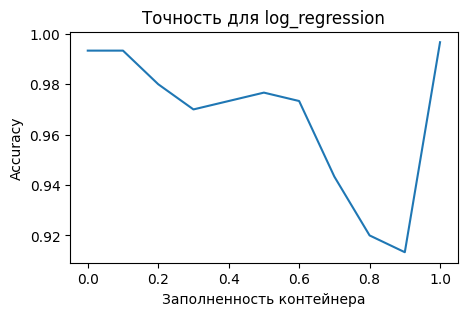

In [6]:
log_regression_accuracy_list = []

for file in files:
    df = pd.read_csv(f'{dir_name}{file}/features.csv')
    # Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
    X = df.drop('label', axis = 1)
    Y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
    # Нормализуем данные
    scaler = StandardScaler()
    X_train_M = scaler.fit_transform(X_train)
    X_test_M = scaler.transform(X_test)
    # Подаем в модель на вход
    model_Log = LogisticRegression() 
    model_Log.fit(X_train_M, y_train)
    Y_Log = model_Log.predict(X_test_M)
    log_regression_accuracy_list.append(accuracy_score(y_test, Y_Log))
    

plt.figure(figsize=(5,3))
plt.title("Точность для log_regression")
plt.ylabel("Accuracy")
plt.xlabel("Заполненность контейнера")
plt.plot(list_padding_level, log_regression_accuracy_list)
plt.show()

In [ ]:
catboost_model = CatBoostClassifier(
    allow_writing_files=False,
    silent=True
)

catboost_accuracy_list = []

for file in files:
    df = pd.read_csv(f'{dir_name}{file}/features.csv')
    # Разделим набор данных на независимые и зависимые переменные. Сохраняем как массив
    X = df.drop('label', axis = 1)
    Y = df['label']
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
    # Нормализуем данные
    scaler = StandardScaler()
    X_train_M = scaler.fit_transform(X_train)
    X_test_M = scaler.transform(X_test)
    # Подаем в модель на вход
    catboost_model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)
    catboost_accuracy_list.append(accuracy_score(y_test, catboost_model.predict(X_test)))
    
    Y_catboost = catboost_model.predict(X_test_M)
    catboost_accuracy_list.append(accuracy_score(y_test, Y_catboost))
    

# plt.figure(figsize=(5,3))
# plt.title("Точность для catboost")
# plt.ylabel("Accuracy")
# plt.xlabel("Заполненность контейнера")
# plt.plot(list_padding_level, catboost_accuracy_list)
# plt.show()

In [ ]:
catboost_accuracy_list